In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd

In [ ]:
path = tf.keras.utils.get_file('reviews.csv','https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print(path)

In [ ]:
df = pd.read_csv(path)
print(df.head(5))

In [ ]:
reviews = df['text'].tolist()
print(reviews)

In [12]:
tokens = Tokenizer(oov_token="<OOV>")
tokens.fit_on_texts(reviews)
word_index = tokens.word_index
print(len(word_index))

3261


In [29]:
sequences = tokens.texts_to_sequences(reviews)
#print(sequences)
padded_sequence = pad_sequences(sequences, padding='post')
print(padded_sequence)
#print(padded_sequence.shape)
#print(reviews[0])
#print(padded_sequence[0])

[[ 28  59   8 ...   0   0   0]
 [ 18 110  87 ...   0   0   0]
 [ 19  13   2 ...   0   0   0]
 ...
 [239   4   9 ...   0   0   0]
 [  2 644 140 ...   0   0   0]
 [121  35  47 ...   0   0   0]]


In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = fetch_20newsgroups()

In [4]:
categories = ['rec.sport.baseball', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
print(train.target)

[1 0 1 ... 2 3 1]


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [8]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [10]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   0.5s
[Pipeline] ..... (step 2 of 2) Processing multinomialnb, total=   0.0s


Text(91.68, 0.5, 'Predicted')

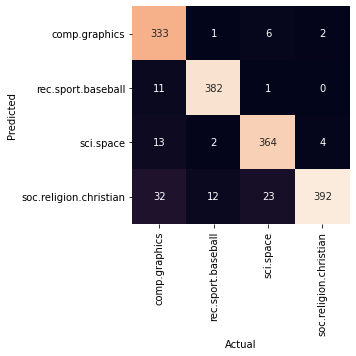

In [11]:
mat=confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=test.target_names)
plt.xlabel('Actual')
plt.ylabel('Predicted')